In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy import optimize
from scipy import stats
import pandas as pd
from scipy.optimize import minimize



def f(w):
    x = w[0]
    y = w[1]
    return (4 - 2.1*(x**2) + (x**4)/3)*(x**2) + x*y + (4*(y**2)-4)*(y**2)

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [52]:
# six-hump camelback function

def func(point):
    x = point[0]
    y = point[1]
    return (4 - 2.1 * (x ** 2) + (x ** 4) / 3) * (x ** 2) + x * y + (4 * (y ** 2) - 4) * (y ** 2)

# restrict variables to −2<𝑥<2 and −1<𝑦<1.

x_lim = (-2, 2)
y_lim = (-1, 1)

x = np.linspace(x_lim[0], x_lim[1], 100, endpoint = True)
y = np.linspace(y_lim[0], y_lim[1], 100, endpoint = True)
xg, yg = np.meshgrid(x, y, sparse = True)
z = func([xg,yg])

# finding global minima

optimize1 = optimize.minimize(func, x0 = (0, -1), method = 'Nelder-Mead')
optimize2 = optimize.minimize(func, x0 = (0, 1), method = 'Nelder-Mead')

print('\nThere are two global minima with the same function values:\n')
print('The function value of the two same global minima is:', optimize1.fun, '\n')
print('The corresponding cooridnate of two minima are:', optimize1.x, ' and ', optimize2.x, '\n')


There are two global minima with the same function values:

The function value of the two same global minima is: -1.031628450217692 

The corresponding cooridnate of two minima are: [ 0.08984807 -0.71267632]  and  [-0.08984945  0.71267605] 



In [53]:
# study the (0,0) case

initial_guess = [0, 0]

optimize3 = optimize.minimize(func, x0 = initial_guess)
print('The minimum of initial guess [x y] = [0 0] with the default solver is:', optimize3.fun)

# study different methods with the (0,0) initial value

optimize4 = optimize.minimize(func, x0 = initial_guess, method = 'Nelder-Mead')
optimize5 = optimize.minimize(func, x0 = initial_guess, method = 'Powell')
optimize6 = optimize.minimize(func, x0 = initial_guess, method = 'CG')
optimize7 = optimize.minimize(func, x0 = initial_guess, method = 'BFGS')
optimize8 = optimize.minimize(func, x0 = initial_guess, method = 'L-BFGS-B')
optimize9 = optimize.minimize(func, x0 = initial_guess, method = 'TNC')
optimize10 = optimize.minimize(func, x0 = initial_guess, method = 'COBYLA')
optimize11 = optimize.minimize(func, x0 = initial_guess, method = 'SLSQP')
optimize12 = optimize.minimize(func, x0 = initial_guess, method = 'trust-constr')

print('\nThe minimum of initial guess [x y] = [0 0] with the Nelder-Mead method is:', optimize4.fun)
print('\nThe minimum of initial guess [x y] = [0 0] with the Powell method is:', optimize5.fun)
print('\nThe minimum of initial guess [x y] = [0 0] with the CG method is:', optimize6.fun)
print('\nThe minimum of initial guess [x y] = [0 0] with the BFGS method is:', optimize7.fun)
print('\nThe minimum of initial guess [x y] = [0 0] with the L-BFGS-B method is:', optimize8.fun)
print('\nThe minimum of initial guess [x y] = [0 0] with the TNC method is:', optimize9.fun)
print('\nThe minimum of initial guess [x y] = [0 0] with the COBYLA method is:', optimize10.fun)
print('\nThe minimum of initial guess [x y] = [0 0] with the SLSQP method is:', optimize11.fun)
print('\nThe minimum of initial guess [x y] = [0 0] with the trust-constr method is:', optimize12.fun)



The minimum of initial guess [x y] = [0 0] with the default solver is: 0.0

The minimum of initial guess [x y] = [0 0] with the Nelder-Mead method is: -1.031628452567338

The minimum of initial guess [x y] = [0 0] with the Powell method is: -1.0316284534898421

The minimum of initial guess [x y] = [0 0] with the CG method is: 0.0

The minimum of initial guess [x y] = [0 0] with the BFGS method is: 0.0

The minimum of initial guess [x y] = [0 0] with the L-BFGS-B method is: 0.0

The minimum of initial guess [x y] = [0 0] with the TNC method is: 0.0

The minimum of initial guess [x y] = [0 0] with the COBYLA method is: -1.0316283555553818

The minimum of initial guess [x y] = [0 0] with the SLSQP method is: 0.0

The minimum of initial guess [x y] = [0 0] with the trust-constr method is: -3.5527136788004773e-15


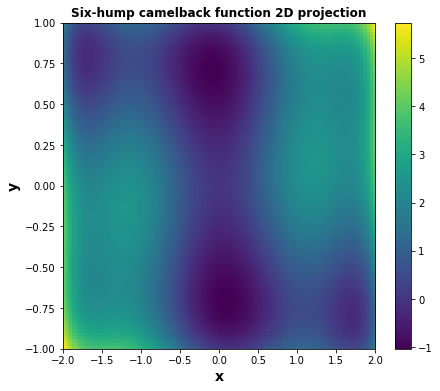

<Figure size 432x288 with 0 Axes>

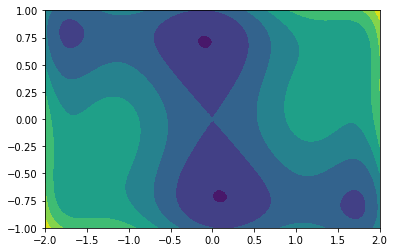

In [54]:
# plotting the function

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (7,6))

axis = np.array([xg,yg], dtype='object')
image1 = ax1.imshow(func(axis), extent = (x_lim[0], x_lim[1], y_lim[0], y_lim[1]), origin='lower', aspect='auto')
plt.figure()
fig.colorbar(image1, ax = ax1)
ax1.set_title('Six-hump camelback function 2D projection', fontweight = 'bold')
ax1.set_xlabel('x', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('y', fontsize = 14, fontweight = 'bold')
plt.show()

plt.contourf(x,y,z)


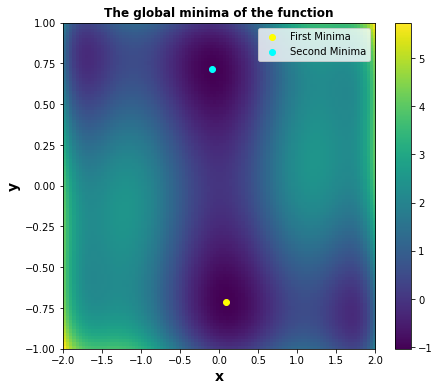

In [55]:
fig, ax2 = plt.subplots(nrows = 1, ncols = 1, figsize = (7,6))

axis = np.array([xg,yg], dtype='object')
image2 = ax2.imshow(func(axis), extent = (x_lim[0], x_lim[1], y_lim[0], y_lim[1]), origin='lower', aspect='auto')
fig.colorbar(image2, ax = ax2)
ax2.set_title('The global minima of the function', fontweight = 'bold')
ax2.set_xlabel('x', fontsize = 14, fontweight = 'bold')
ax2.set_ylabel('y', fontsize = 14, fontweight = 'bold')

x1 = [0.08984807, -0.71267632]
x2 = [-0.08984945, 0.71267605]

plt.scatter(x1[0], x1[1], color= 'yellow', label = 'First Minima')
plt.scatter(x2[0], x2[1], color = 'cyan' , label = 'Second Minima')

plt.legend()
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [123]:
# preparing data

months =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
T_max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
T_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

data = pd.DataFrame()
data['Months'] = months
data['T_max'] = T_max
data['T_min'] = T_min
display(data)


,Months,T_max,T_min
0,Jan,17,-62
1,Feb,19,-59
2,Mar,21,-56
3,Apr,28,-46
4,May,33,-32
5,Jun,38,-18
6,Jul,37,-9
7,Aug,37,-13
8,Sep,31,-25
9,Oct,23,-46


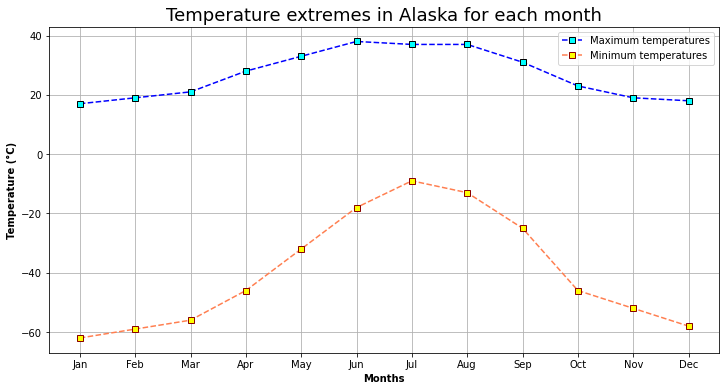

In [124]:
# ploting the temperature extremes 

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))
plt.plot(months, T_max, label = 'Maximum temperatures', ls = '--', marker = 's', color = 'blue', mfc = 'cyan', mec = 'black')
plt.plot(months, T_min, label = 'Minimum temperatures', ls = '--', marker = 's', color = 'coral', mfc = 'yellow', mec = 'darkred')
ax.set_ylabel('Temperature (°C)', fontweight = 'bold')
ax.set_xlabel('Months', fontweight = 'bold')
ax.set_title('Temperature extremes in Alaska for each month', fontsize = 18)
ax.legend()
ax.grid()
plt.show()

In [125]:
# defining a function that can describe min and max temperatures

def func(x, T_avg, A, freq, time_offset):
    return T_avg + A * np.exp(-0.5*np.power((x-freq)/time_offset, 2))


# fit data
optimize_max, covariance_max = optimize.curve_fit(f = func, xdata = data.index.values, ydata = T_max, p0 = [0,10,6,1], full_output = False)
optimize_min, covariance_min = optimize.curve_fit(f = func, xdata = data.index.values, ydata = T_min, p0 = [-70,10,6,1], full_output = False)

print('Optimizations for maximum T:', optimize_max)
print('Optimizations for minimum T:', optimize_min)

Optimizations for maximum T: [15.77931238 23.09209072  5.73581653  2.29443691]
Optimizations for minimum T: [-61.32093678  52.64929219   6.16452599   1.97590017]


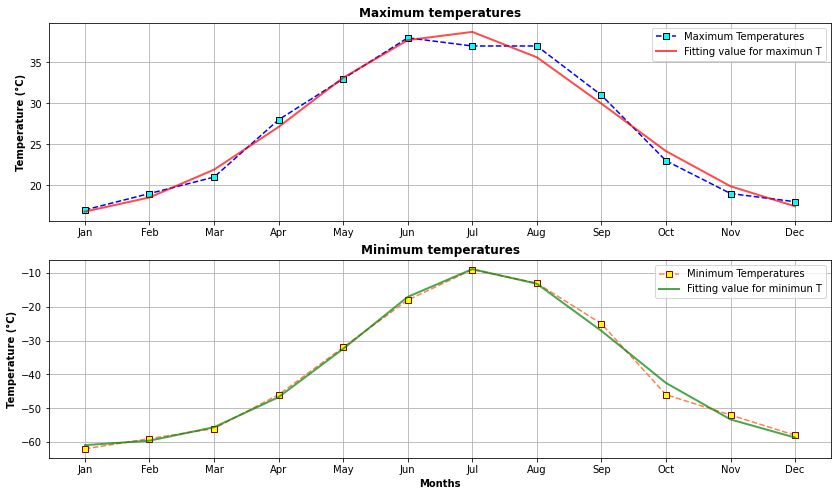

In [127]:
# Ploting the result

x = np.arange(0,12)
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 8))

ax1.plot(months, T_max, label = 'Maximum Temperatures', ls = '--', marker = 's', color = 'blue', mfc = 'cyan', mec = 'black')
max_func = func(x, optimize_max[0], optimize_max[1], optimize_max[2], optimize_max[3])
ax1.plot(x, max_func, alpha = 0.7, label = 'Fitting value for maximun T', lw = 2, color = 'red')
ax1.set_ylabel('Temperature (°C)', fontweight = 'bold')
ax1.set_title('Maximum temperatures', fontsize = 12, fontweight = 'bold')
ax1.legend()
ax1.grid()

ax2.plot(months, T_min, label = 'Minimum Temperatures', ls = '--', marker = 's', color = 'coral', mfc = 'yellow', mec = 'darkred')
min_func = func(x, optimize_min[0], optimize_min[1], optimize_min[2], optimize_min[3])
ax2.plot(x, min_func, alpha = 0.7, label = 'Fitting value for minimun T', lw = 2, color='green')
ax2.set_ylabel('Temperature (°C)', fontweight = 'bold')
ax2.set_xlabel('Months', fontweight = 'bold')
ax2.set_title('Minimum temperatures', fontsize = 12, fontweight = 'bold')
ax2.legend()
ax2.grid()
plt.show()


In [85]:
# Is the fit reasonable? If not, why?

print('According to the plots: the fits for maximum temperature and minimum temperature decribe \
accurately the data. So, they are reasonable and makes sense to model with a periodic function. \
As illustrate in the plotes, minimum dataset was more simillat to fitting Gaussian line.')


# Is the time offset for min and max temperatures the same within the fit accuracy?

print('\nTime offset for min and max temperatures within the fit accuracy: ', optimize_max[3] - optimize_min[3])
print('Consequently, the time offset for min and max temperatures are the same within the fit accuracy.')


According to the plots: the fits for maximum temperature and minimum temperature decribe accurately the data. So, they are reasonable and makes sense to model with a periodic function. As illustrate in the plotes, minimum dataset was more simillat to fitting Gaussian line.

Time offset for min and max temperatures within the fit accuracy:  0.3185367394021579
Consequently, the time offset for min and max temperatures are the same within the fit accuracy.


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [2]:
# importing data

data = np.load('D:/G/Books/Geophysics/Padova University/Semester 3/HIGH LEVEL PROGRAMMING/Data/residuals_261.pkl', allow_pickle = True)
print('\nThe dataset:\n')
display(data)

print('\n\nThe dataframe:\n')
data_frame = pd.DataFrame.from_dict(data.item())
display(data_frame)

print('There are in total:', len(data_frame), 'data.')

ranges=2
print("\nThe histogram would have some really long tails, especially on the left, while the interesting part is only close to zero. So we restrict the interval we study, since about 95% of the data is in the interval (",-ranges,",",ranges,").")
df=data_frame.loc[(data_frame['residuals'] >= -ranges) & (data_frame['residuals'] <= ranges)]
print("\nThere are in total:",len(data_frame),"data in the interval.")


The dataset:



array({'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])},
      dtype=object)



The dataframe:



,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


There are in total: 11131 data.

The histogram would have some really long tails, especially on the left, while the interesting part is only close to zero. So we restrict the interval we study, since about 95% of the data is in the interval ( -2 , 2 ).

There are in total: 11131 data in the interval.


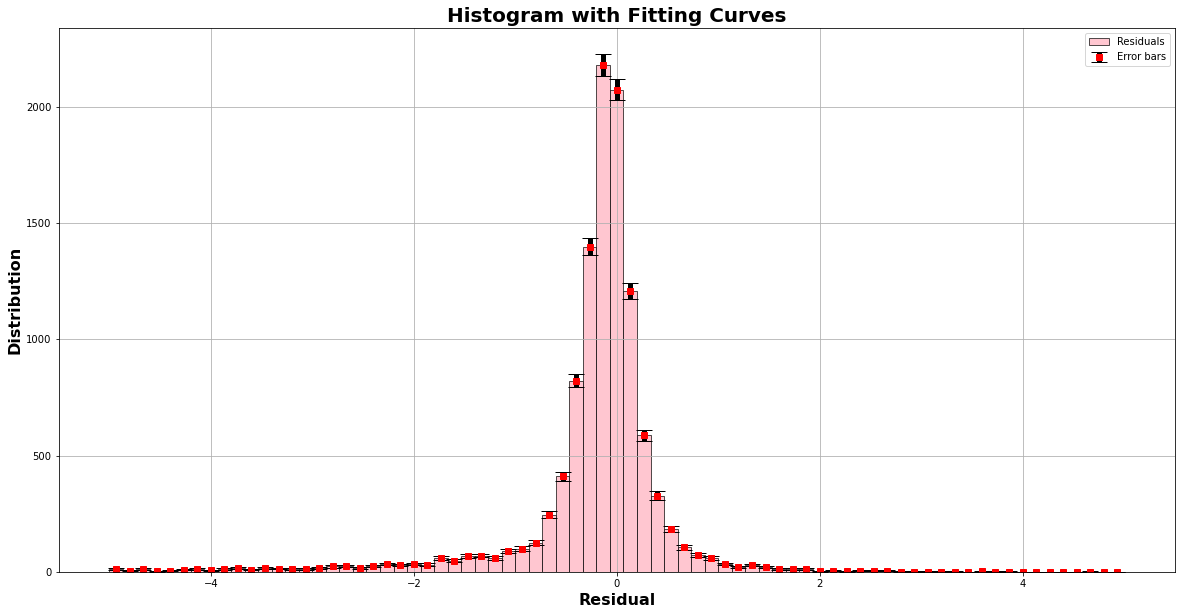

This histogram have two long tails.
However, the most interesting part is the interval between ( -2 , 2 ), which contribuets more or less 95% of the data.


In [6]:
# creating the histogram

fig, ax  = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))

bins_number = 75 
counts, bins , _ = ax.hist(data_frame['residuals'], bins = bins_number , range = (-5, 5) , linewidth = 0.75, alpha = 0.9 , label = 'Residuals', color = 'pink', edgecolor = 'black')

ax.grid()
ax.set_title('Histogram with Fitting Curves' , fontsize = 20, fontweight = 'bold')
ax.set_ylabel('Distribution', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Residual', fontsize = 16, fontweight = 'bold')


# Setting the appropriate Poisson uncertainty for each bin and displaying the error bar
# defining an appropriate function

bins_center = bins[0:len(bins)-1] - (bins[0]-bins[1])/2  #centre of the bins

ax.errorbar(x = bins_center, y = counts, yerr = np.sqrt(counts), marker = 's', capsize = 8, linestyle = 'None', color = 'red', ecolor = 'black', elinewidth = 5, label = 'Error bars')
ax.legend()
plt.show()

iteresting_range = (-2, 2)

print('This histogram have two long tails.') 
print('However, the most interesting part is the interval between (', iteresting_range[0], ',', iteresting_range[1], '), which contribuets more or less 95% of the data.')


In [7]:
# defining fitting function

def gaussian(x, a, x0, sigma):
    return a * np.exp(-((x - x0) ** 2 / (2 * sigma ** 2)))

def lorentzian( x, x0, a, gam ):
     return x0 * gam ** 2 / (gam ** 2 + (x - a) ** 2)

def voigt(x, x0, y0, a, mu, sigma, gam):     
     return gaussian(x, x0, y0, a) + lorentzian(x, mu, sigma, gam)

#sigma = alpha / np.sqrt(2 * np.log(2))
sigma = counts ** 0.5

# fitting the data

optimize_gaussian, covariance_gaussian = optimize.curve_fit(f = gaussian, xdata = bins_center, ydata = counts, p0 = [1500, 0, 1])

print('\nGaussian Mthod:')
print("\nThe parameters obtained by the Gaussian fitting method are:\n", optimize_gaussian)
print("\nTheir errors are:\n", np.sqrt(np.diag(covariance_gaussian)))


optimize_lorentzian, covariance_lorentzian = optimize.curve_fit(f = lorentzian, xdata = bins_center, ydata = counts, p0 = [1300, 0, 1])

print('\n\nLorentzian Mthod:')
print("\nThe parameters obtained by the Lorentzian fitting method are:\n", optimize_lorentzian)
print("\nTheir errors are:\n", np.sqrt(np.diag(covariance_lorentzian)))

optimize_voigt, covariance_voigt = optimize.curve_fit(f = voigt, xdata = bins_center, ydata = counts, p0 = [900, 0, 1, 40, 1, 1])

print('\n\nVoigt Mthod:')
print("\nThe parameters obtained by the Voigt fitting method are:\n", optimize_voigt)
print("\nTheir errors are:\n", np.sqrt(np.diag(covariance_voigt)))



Gaussian Mthod:

The parameters obtained by the Gaussian fitting method are:
 [ 2.12430474e+03 -8.72623150e-02  2.29089062e-01]

Their errors are:
 [3.75522085e+01 4.67623790e-03 4.67623788e-03]


Lorentzian Mthod:

The parameters obtained by the Lorentzian fitting method are:
 [ 2.36514916e+03 -8.37662095e-02  2.11014609e-01]

Their errors are:
 [2.46704820e+01 2.15347182e-03 3.12699573e-03]


Voigt Mthod:

The parameters obtained by the Voigt fitting method are:
 [ 7.02984292e+02  1.49783469e-02  1.33092065e-01  1.81600468e+03
 -1.31364722e-01 -2.25043494e-01]

Their errors are:
 [2.17861204e+02 4.17387588e-02 2.42049591e-02 3.36307212e+02
 1.05513243e-02 2.20748159e-02]


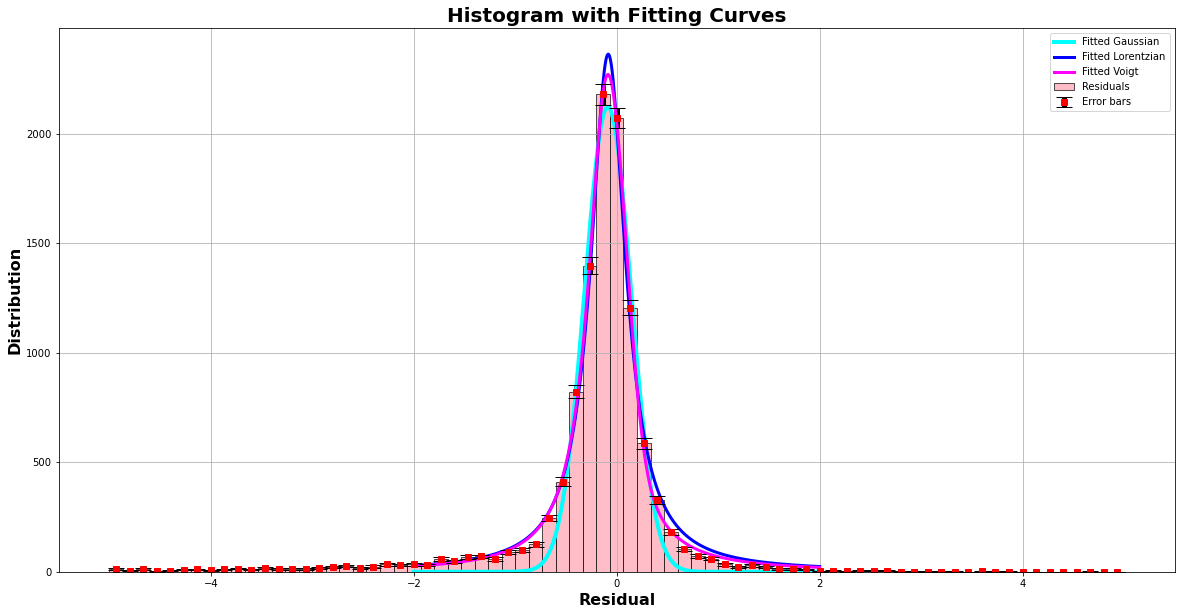

In [16]:
# plotting fitted curves

fig, ax  = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))

bins_number = 75 
counts, bins , _ = ax.hist(data_frame['residuals'], bins = bins_number , range = (-5, 5) , linewidth = 0.75, alpha = 0.9 , label = 'Residuals', color = 'lightpink', edgecolor = 'black')

ax.grid()
ax.set_title('Histogram with Fitting Curves' , fontsize = 20, fontweight = 'bold')
ax.set_ylabel('Distribution', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Residual', fontsize = 16, fontweight = 'bold')

x = np.linspace(-2, 2, 500)
ax.plot(x, gaussian(x, * optimize_gaussian), color = 'cyan', lw = 4, label = 'Fitted Gaussian')
ax.plot(x, lorentzian(x, * optimize_lorentzian), color = 'blue', lw = 3, label = 'Fitted Lorentzian')
ax.plot(x, voigt(x, * optimize_voigt), color = 'magenta', lw = 3, label = 'Fitted Voigt')
ax.errorbar(x = bins_center, y = counts, yerr = np.sqrt(counts), marker = 's', capsize = 8, linestyle = 'None', color = 'red', ecolor = 'black', elinewidth = 5, label = 'Error bars')

ax.legend()


In [25]:
# Performing a goodness-of-fit test. Is the p-value of the fit satisfactory?

# Chi-squared test
frac_gaussian = (gaussian(bins_center, optimize_gaussian[0], optimize_gaussian[1], optimize_gaussian[2])-counts)/np.sqrt(counts)
chi2_gaussian = np.sum(np.power(frac_gaussian[np.isfinite(frac_gaussian)], 2.))

frac_lorentzian = (lorentzian(bins_center, optimize_lorentzian[0], optimize_lorentzian[1], optimize_lorentzian[2])-counts)/np.sqrt(counts)
chi2_lorentzian = np.sum(np.power(frac_lorentzian[np.isfinite(frac_lorentzian)], 2.))

frac_voigt = (voigt(bins_center, optimize_voigt[0], optimize_voigt[1], optimize_voigt[2], optimize_voigt[3], optimize_voigt[4], optimize_voigt[5])-counts)/np.sqrt(counts)
chi2_voigt = np.sum(np.power(frac_voigt[np.isfinite(frac_voigt)], 2.))

print('\nThe value of the chi^2 for Gaussian fit is:', (chi2_gaussian))
print('The value of the chi^2 for Lorentzian fit is:', (chi2_lorentzian))
print('The value of the chi^2 for Voigt fit is:', (chi2_voigt))

# R^2 test
R2_gaussian = 1 - np.sum(np.power(gaussian(bins_center, optimize_gaussian[0], optimize_gaussian[1], optimize_gaussian[2]) - counts, 2)) / np.sum(np.power(np.sum(counts) - counts, 2))
R2_lorentzian = 1 - np.sum(np.power(lorentzian(bins_center, optimize_lorentzian[0], optimize_lorentzian[1], optimize_lorentzian[2])-counts, 2))/np.sum(np.power(np.sum(counts)-counts, 2))
R2_voigt = 1 - np.sum(np.power(voigt(bins_center, optimize_voigt[0], optimize_voigt[1], optimize_voigt[2], optimize_voigt[3], optimize_voigt[4], optimize_voigt[5]) - counts, 2)) / np.sum(np.power(np.sum(counts) - counts, 2))

print('\nThe value of the R^2 for Gaussian fit is:', (1 - R2_gaussian))
print('The value of the R^2 for Lorentzian fit is:',(1 - R2_lorentzian))
print('The value of the R^2 for Voigt fit is:',(1 - R2_voigt))

# computing P-value
freedom_degree_gaussian = len(bins_center)-3
freedom_degree_lorentzian = len(bins_center)-3
freedom_degree_voigt = len(bins_center)-5

p_value_gaussian = stats.chi2.sf(chi2_gaussian, freedom_degree_gaussian)
p_value_lorentzian = stats.chi2.sf(chi2_lorentzian, freedom_degree_lorentzian)
p_value_voigt = stats.chi2.sf(chi2_v, freedom_degree_voigt)

print('\nThe p-value of Gaussian fit is:', (p_value_gaussian))
print('The p-value of Lorentzian fit is:', (p_value_lorentzian))
print('The p-value of Voigt fit is:', (p_value_voigt))

print('\nSinse it is obvious in historam with fitting curves as well, These acquired data are reliable./n')



The value of the chi^2 for Gaussian fit is: 1657.161321455087
The value of the chi^2 for Lorentzian fit is: 1595.7303282120279
The value of the chi^2 for Voigt fit is: 989.5236667493494

The value of the R^2 for Gaussian fit is: 2.392155836439258e-05
The value of the R^2 for Lorentzian fit is: 6.173443004353629e-06
The value of the R^2 for Voigt fit is: 2.6573728031387134e-06

The p-value of Gaussian fit is: 1.986991317706545e-298
The p-value of Lorentzian fit is: 1.1596250182399626e-285
The p-value of Voigt fit is: 1.985282152086686e-162

Sinse it is obvious in historam with fitting curves as well, These acquired data are reliable./n


<ipython-input-25-d8d7a0ccc164>:4: RuntimeWarning: divide by zero encountered in true_divide
  frac_gaussian = (gaussian(bins_center, optimize_gaussian[0], optimize_gaussian[1], optimize_gaussian[2])-counts)/np.sqrt(counts)
<ipython-input-25-d8d7a0ccc164>:7: RuntimeWarning: divide by zero encountered in true_divide
  frac_lorentzian = (lorentzian(bins_center, optimize_lorentzian[0], optimize_lorentzian[1], optimize_lorentzian[2])-counts)/np.sqrt(counts)
<ipython-input-25-d8d7a0ccc164>:10: RuntimeWarning: divide by zero encountered in true_divide
  frac_voigt = (voigt(bins_center, optimize_voigt[0], optimize_voigt[1], optimize_voigt[2], optimize_voigt[3], optimize_voigt[4], optimize_voigt[5])-counts)/np.sqrt(counts)


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [8]:
# importing data

file_name = 'D:/G/Books/Geophysics/Padova University/Semester 3/HIGH LEVEL PROGRAMMING/Data/munich_temperatures_average_with_bad_data.txt'
Date , Temperature = np.loadtxt(file_name , unpack = True) 
data_frame = pd.read_csv(file_name, sep =' ', header = None)
data_frame.columns = ['Date', 'Temperature']

display(data_frame)

indx = np.abs(Temperature) < 90
Date = Date[indx]
Temperature = Temperature[indx]

,Date,Temperature
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


In [9]:
# selecting a range of date (2008-2012) and filtering out the rest
date_range = (2008 <= data_frame['Date']) & (data_frame['Date'] <= 2012) & (np.abs(data_frame['Temperature']) < 30)
date, temperature = data_frame.loc[date_range,'Date'], data_frame.loc[date_range,'Temperature']


Text(0, 0.5, 'Temperature (°C)')

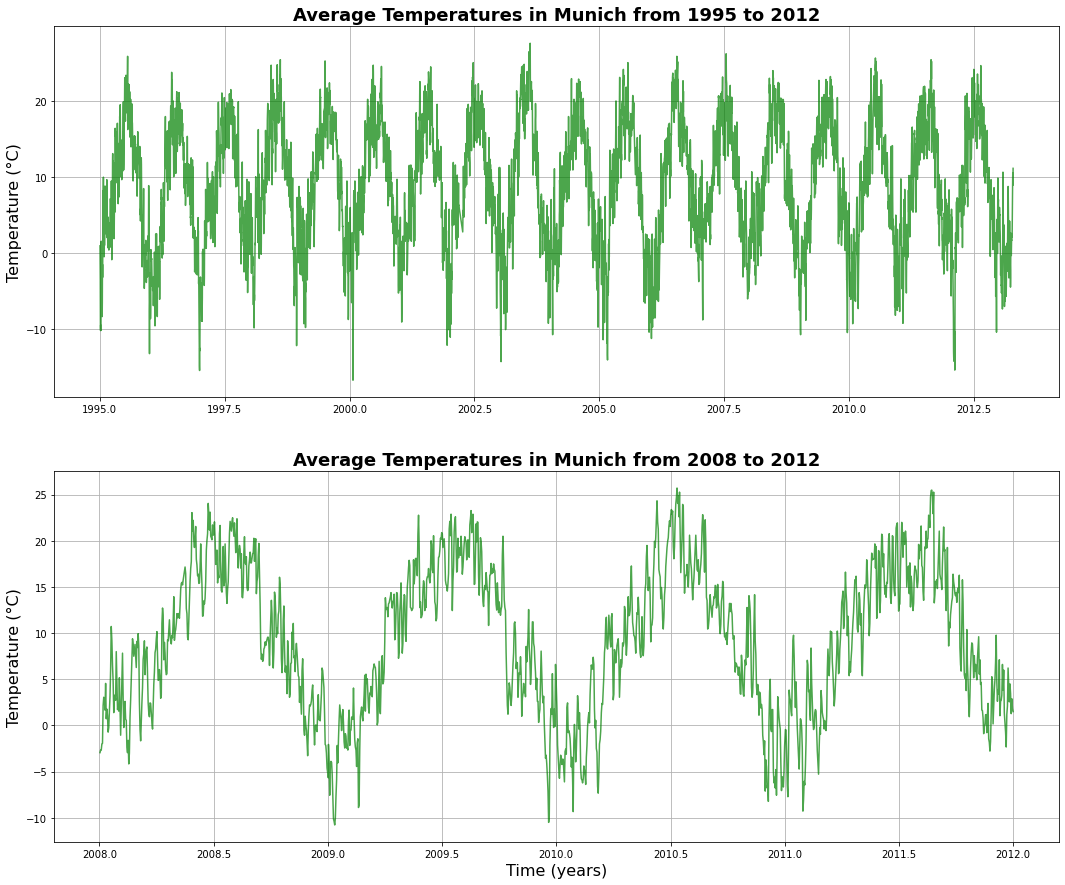

In [57]:
# plotting the data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (18, 15))
ax1.plot(Date, Temperature, label = 'Whole Data', alpha = 0.7, color = 'green')
ax1.grid()
ax1.set_title('Average Temperatures in Munich from 1995 to 2012', fontsize = 18, fontweight = 'bold')
ax1.set_ylabel('Temperature (°C)', fontsize = 16)


ax2.plot(date, temperature, label = 'Filtered Data', alpha = 0.7, color = 'green')
ax2.grid()
ax2.set_title('Average Temperatures in Munich from 2008 to 2012', fontsize = 18, fontweight = 'bold')
ax2.set_xlabel('Time (years)', fontsize = 16)
ax2.set_ylabel('Temperature (°C)', fontsize = 16)


In [77]:
   # FIRST FITTING FUNCTION:

# defining functions to be fitted
def fit_func_1(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# fitting the data with the best fit
optimize_1, covariance_1 = optimize.curve_fit(f = fit_func_1, xdata = date, ydata = temperature,  p0 = [10, 3, 10])

print('\n"ACCORDING TO THE FIRST FITTING FINCTION"\n')
print('The best values of fitted results for the first fitting function are: ')
print('\ta (amplitude) \t =', optimize_1[0])
print('\tb (time-shift) \t =', optimize_1[1])
print('\tc (temperature-shift) =', optimize_1[2])

print('\nThe overall average temperature in Munich is = ', round(optimize_1[2], 2), 'Celsius degrees')
print('The hottest temperature in year is =', round(optimize_1[2] + optimize_1[0], 2), 'Celsius degrees')
print('The coldest temperature in year is =', round(optimize_1[2] - optimize_1[0], 2), 'Celsius degrees')


   # SECOND FITTING FUNCTION:

# defining functions to be fitted

def fit_func_2(t, a, b, c, d):
    return a * np.cos(2 * np.pi * b * t + c) + d

# fitting the data
optimize_2, covariance_2 = optimize.curve_fit(f = fit_func_2, xdata = date, ydata = temperature, p0 = [10, 1, 3, 10]) 

print('\n\n"ACCORDING TO THE SECOND FITTING FINCTION"\n')
print('The best values of fitted results for the second fitting function are: ')
print('\ta (amplitude) \t =', optimize_2[0])
print('\tb (periods in a year) \t =', optimize_2[1])
print('\tc (time-shift) =', optimize_2[2])
print('\td (temperature-shift) =', optimize_2[3])

print('\nThe overall average temperature in Munich is = ', round(optimize_2[2], 2), 'Celsius degrees')
print('The hottest temperature in year is =', round(optimize_2[2] + optimize_2[0], 2), 'Celsius degrees')
print('The coldest temperature in year is =', round(optimize_2[2] - optimize_2[0], 2), 'Celsius degrees')

# definition of the b parameter
print('\nThe b parameter is a constant whic defines the shifting in time (the phase shift) corresponds to the \
horizontal shift of the temperature distribution. so this parameter matches the temperature to the correct time \
(period of the year). Actually, It works as a time offset.\nThe correct 𝑏 parameter results a low temperature \
during the winter and a high temperature during the summer.')
    


"ACCORDING TO THE FIRST FITTING FINCTION"

The best values of fitted results for the first fitting function are: 
	a (amplitude) 	 = 9.962034679983079
	b (time-shift) 	 = 2.9069648970434323
	c (temperature-shift) = 9.262821312368194

The overall average temperature in Munich is =  9.26 Celsius degrees
The hottest temperature in year is = 19.22 Celsius degrees
The coldest temperature in year is = -0.7 Celsius degrees


"ACCORDING TO THE SECOND FITTING FINCTION"

The best values of fitted results for the second fitting function are: 
	a (amplitude) 	 = 9.960773554217262
	b (periods in a year) 	 = 1.0002932660939985
	c (time-shift) = -0.7968582178448065
	d (temperature-shift) = 9.265672681974163

The overall average temperature in Munich is =  -0.8 Celsius degrees
The hottest temperature in year is = 9.16 Celsius degrees
The coldest temperature in year is = -10.76 Celsius degrees

The b parameter is a constant whic defines the shifting in time (the phase shift) corresponds to the horizon

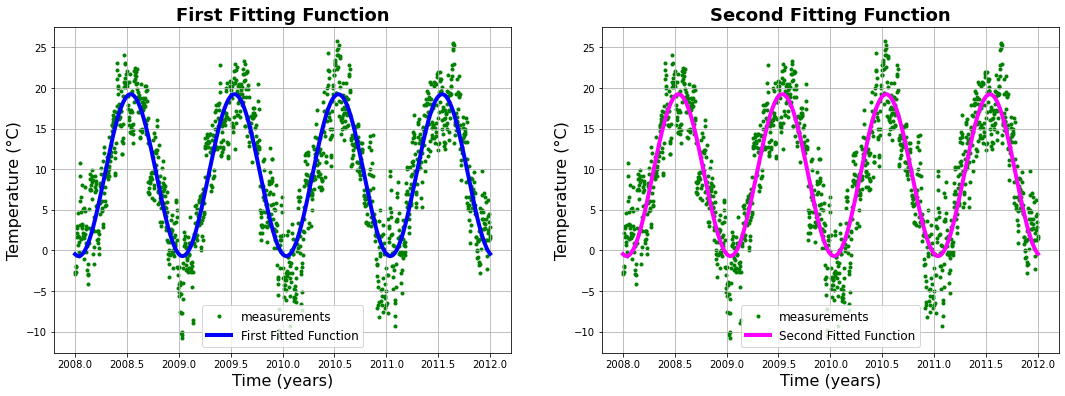

In [80]:
    # PLOTTING
    
# plotting the first fit
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
ax1.plot(date, temperature, 'o', color = 'green', markersize = 3, label = 'measurements', zorder = 1)
ax1.plot(date, fit_func_1(date, optimize_1[0], optimize_1[1], optimize_1[2]), color='blue', lw = 4, alpha = 1, label = 'First Fitted Function')

ax1.grid()
ax1.set_title('First Fitting Function', fontsize = 18, fontweight = 'bold')
ax1.set_xlabel('Time (years)', fontsize = 16)
ax1.set_ylabel('Temperature (°C)', fontsize = 16)
ax1.legend(fontsize=12)

# plotting the second fit
ax2.plot(date, temperature, 'o', color = 'green', markersize = 3, label = 'measurements', zorder = 1)
ax2.plot(date, fit_func_2(date, optimize_2[0], optimize_2[1], optimize_2[2], optimize_2[3]), color = 'magenta', lw = 4, alpha = 1, label = 'Second Fitted Function')

ax2.grid()
ax2.set_title('Second Fitting Function', fontsize = 18, fontweight = 'bold')
ax2.set_xlabel('Time (years)', fontsize = 16)
ax2.set_ylabel('Temperature (°C)', fontsize = 16)
ax2.legend(fontsize=12)

plt.show()

In [93]:

# computing RSS for first and second functions
rss_1 = np.sum((fit_func_1(date, optimize_1[0], optimize_1[1], optimize_1[2]) - temperature) ** 2)
rss_2 = np.sum((fit_func_2(date, optimize_2[0], optimize_2[1], optimize_2[2], optimize_2[3]) - temperature) ** 2)

print('"RSS"\n')
print('RSS for the first function (with 3 parameters):', rss_1)
print('RSS for the second function (with 4 parameters):', rss_2)

freedom_degree_1 = 3 - 1
freedom_degree_2 = 4 - 1

# performing Fisher F-test
F = ((rss_1 - rss_2) / (freedom_degree_2 - freedom_degree_1))/(rss_2 / (len(date) - freedom_degree_2))
CL = stats.f.sf(F, freedom_degree_2 - freedom_degree_1, len(date) - freedom_degree_2)

print('\n\n"Fisher F-test"')
print('\nThe F-test result is:', F)
print('The Confidence level is:', CL)
print('\nThe performances of the first and second functions are the same. Therefore, the additional parameter used in the second function \
does not be necessary to improve the fit performances.')


"RSS"

RSS for the first function (with 3 parameters): 18669.515394578364
RSS for the second function (with 4 parameters): 18669.22543086287


"Fisher F-test"

The F-test result is: 0.022614069947590756
The Confidence level is: 0.8804858439529591

The performances of the first and second functions are the same. Therefore, the additional parameter used in the second function does not be necessary to improve the fit performances.
